In [1]:
"""=============================================================================
Bài toán: Một thanh tra giao thông đã đếm số lượng ô tô đi qua một điểm nhất định 
          trong 100 khoảng thời gian (cách nhau 20 phút). Các quan sát được liệt kê
          trong tập tin count_cars.txt.
   1. Tạo cars_array từ nội dung tập tin.
   2. Vẽ biểu đồ phân phối tần suất của cars_array
   3. Thống kê cơ bản cho cars_array; 
      mean, median, mode (những giá trị nào? số lần bao nhiêu?), max, min, ...
   4. Tìm range
   5. Cho biết giá trị ở phân vị thứ [5, 15, 25, 50, 75, 90] của cars_array. 
      Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.
   6. Vẽ boxplot của cars_array. 
      Dùng z-score để xác định outliers (indexes nào ? giá trị outliers ?)
   7. Tìm IQR cho car_arrays
   8. Tìm phương sai (variance) cùa cars_array
   9. Tìm độ lệch chuẩn Standard deviation của cars_array
   10. Tìm độ xiên (Skewness) của cars_array. Nhận xét kết quả.
   11. Tìm độ nhọn Kurtosis của cars_array. Nhận xét kết quả.   
============================================================================="""
print()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from matplotlib.gridspec import GridSpec
from scipy import stats

In [4]:
print('=====================================================')
print('*** 1. create cars_array from count_cars.txt file ***')
print('=====================================================')

f1 = open('data_Buoi7&8/count_cars.txt')
cars = f1.read().replace('\n',' ').split(' ')
cars_array = np.array([eval(number) for number in cars])
f1.close()

cars_array

*** 1. create cars_array from count_cars.txt file ***


array([23, 20, 16, 18, 30, 22, 26, 15,  5, 18, 14, 17, 11, 37, 21,  6, 10,
       20, 22, 25, 19, 19, 19, 20, 12, 23, 24, 17, 18, 16, 27, 16, 28, 26,
       15, 29, 19, 35, 20, 17, 12, 30, 21, 22, 20, 15, 18, 16, 23, 24, 15,
       24, 28, 19, 24, 22, 17, 19,  8, 18, 17, 18, 23, 21, 25, 19, 20, 22,
       21, 21, 16, 20, 19, 11, 23, 17, 23, 13, 17, 26, 26, 14, 15, 16, 27,
       18, 21, 24, 33, 20, 21, 27, 18, 22, 17, 20, 14, 21, 22, 19])

*** 2. Draw distribution plot (histogram) of cars_array ***


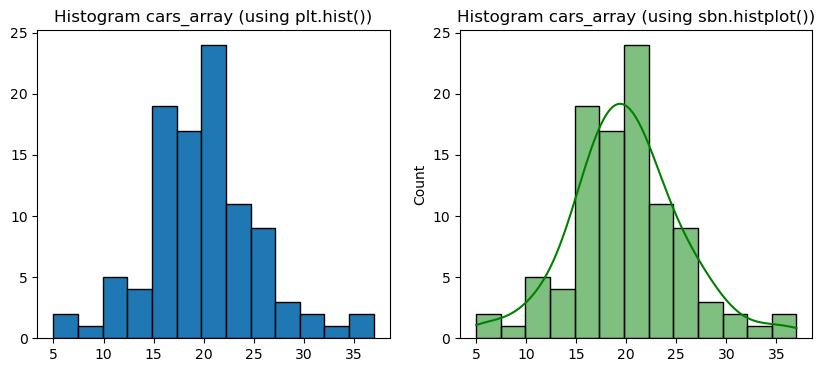

In [7]:
print('============================================================')
print('*** 2. Draw distribution plot (histogram) of cars_array ***')
print('============================================================')

fig = plt.figure(figsize=(10,4))
grsp = GridSpec(nrows=1, ncols=2)

hist_plt = fig.add_subplot(grsp[0,0])
hist_plt.set_title('Histogram cars_array (using plt.hist())')
hist_plt.hist(cars_array, edgecolor='black', bins=13)

hist_sbn = fig.add_subplot(grsp[0,1])
sbn.histplot(cars_array, color='green', kde=True)
hist_sbn.set_title('Histogram cars_array (using sbn.histplot())')

plt.show()

In [9]:
print('========================================================================================')
print('*** 3. Do basic descriptive statistics for cars_array (mean, median, mode, max, min) ***')
print('========================================================================================')

print(f'\nMean of cars_array = {np.mean(cars_array)}')
print(f'Geometric mean of cars_array = {stats.gmean(cars_array)}')
print(f'Harmonic mean of cars_array = {stats.hmean(cars_array)}')

print(f'\nMedian of cars_array = {np.median(cars_array)}')
print(f'\nMax of cars_array = {np.max(cars_array)}')
print(f'\nMin of cars_array = {np.min(cars_array)}')

mode_cars = stats.mode(cars_array)
#scipy.stats.mode(x) returns a tuple having 2 elements
#The first element [0] is the value of that mode
#The second one [1] is the count (frequency) of that mode value

print(f'\nMode value of cars_array = {mode_cars[0]}')
print(f'Mode frequency of cars_array = {mode_cars[1]}')

*** 3. Do basic descriptive statistics for cars_array (mean, median, mode, max, min) ***

Mean of cars_array = 19.97
Geometric mean of cars_array = 19.10751805565697
Harmonic mean of cars_array = 18.01741946564974

Median of cars_array = 20.0

Max of cars_array = 37

Min of cars_array = 5

Mode value of cars_array = 19
Mode frequency of cars_array = 9


In [11]:
print('======================================================================')
print('*** 4. Find the range of cars_array ***')
print('======================================================================')
range_cars = np.ptp(cars_array) #ptp = 'peak to peak', this numpy.ptp(x) will return the range = max - min of x array
print(f"Range of cars_array's values: {range_cars}")

*** 4. Find the range of cars_array ***
Range of cars_array's values: 32


*** 5. Calculate percentiles [5, 15, 25, 50, 75, 90] of cars_array ***


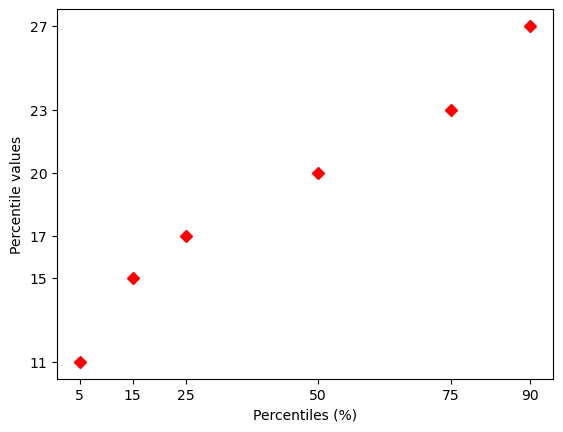

In [13]:
print('=====================================================================')
print('*** 5. Calculate percentiles [5, 15, 25, 50, 75, 90] of cars_array ***')
print('======================================================================')
percentiles = [5, 15, 25, 50, 75, 90] #x axis
perc_values = np.percentile(cars_array, percentiles) #y axis

plt.plot(percentiles, perc_values, marker = 'D', color = 'red', linestyle = 'none') #linestyle = 'none' to remove the line
plt.xlabel('Percentiles (%)')
plt.ylabel('Percentile values')
plt.yticks(perc_values)
plt.xticks(percentiles)
plt.show()


#Python, R and Excel calculate the index for specific percentile value by this following formula:
#        index = [p*(n-1)]/100 + 1
# where p is the percentile ranging from 0 to 100, and n is the size of the sample/population
#So, what if the index is a float, not integer (for example 3.25)?

#np.percentile(x, p, method='lower') ===> if calculated index = 3.25, then it will return: x[3]
#np.percentile(x, p, method='upper') ===> if calculated index = 3.25, then it will return: x[4]
#np.percentile(x, p, method='nearest') ===> if calculated index = 3.25, then it will return: x[3] because 3.25 is nearer to 3 than 4

#np.percentile(x, method='midpoint') ===> if calculated index = 3.25, then it will return: (x[3] + x[4])/2

#np.percentile(x, method='linear') ===> if calculated index = 3.25, then it will return: x[3] + (x[4] - x[3])*0.25

*** 6. Draw boxplot for cars_array, and use z-score to find outliers (values, indexes) ***


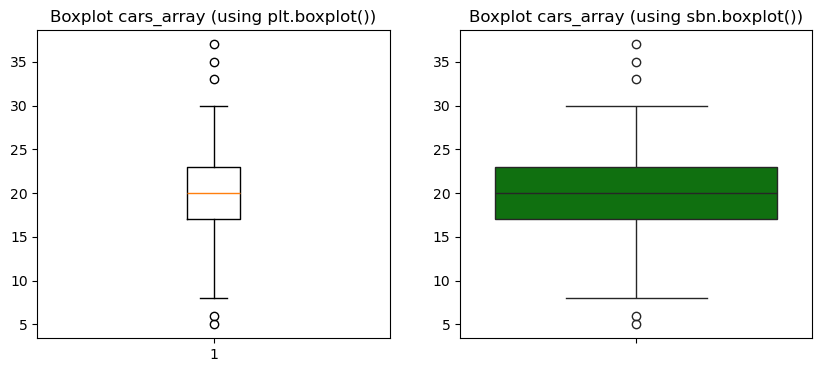


The z-score of cars_array is:
[ 0.54874468  0.00543312 -0.71898231 -0.3567746   1.81647168  0.36764083
  1.09205625 -0.90008617 -2.71112473 -0.3567746  -1.08119002 -0.53787845
 -1.62450159  3.08419867  0.18653697 -2.53002087 -1.80560545  0.00543312
  0.36764083  0.9109524  -0.17567074 -0.17567074 -0.17567074  0.00543312
 -1.44339773  0.54874468  0.72984854 -0.53787845 -0.3567746  -0.71898231
  1.27316011 -0.71898231  1.45426396  1.09205625 -0.90008617  1.63536782
 -0.17567074  2.72199096  0.00543312 -0.53787845 -1.44339773  1.81647168
  0.18653697  0.36764083  0.00543312 -0.90008617 -0.3567746  -0.71898231
  0.54874468  0.72984854 -0.90008617  0.72984854  1.45426396 -0.17567074
  0.72984854  0.36764083 -0.53787845 -0.17567074 -2.16781316 -0.3567746
 -0.53787845 -0.3567746   0.54874468  0.18653697  0.9109524  -0.17567074
  0.00543312  0.36764083  0.18653697  0.18653697 -0.71898231  0.00543312
 -0.17567074 -1.62450159  0.54874468 -0.53787845  0.54874468 -1.26229388
 -0.53787845  1.09205

In [15]:
print('===========================================================================================')
print('*** 6. Draw boxplot for cars_array, and use z-score to find outliers (values, indexes) ***')
print('===========================================================================================')

fig = plt.figure(figsize=(10,4))
grsp = GridSpec(nrows=1, ncols=2)

box_plt = fig.add_subplot(grsp[0,0])
box_plt.set_title('Boxplot cars_array (using plt.boxplot())')
box_plt.boxplot(cars_array)

box_sbn = fig.add_subplot(grsp[0,1])
sbn.boxplot(cars_array, color='green')
box_sbn.set_title('Boxplot cars_array (using sbn.boxplot())')

plt.show()

#------------z-score to find outliers--------------#

#z-score is a standardized form of a sample/population

#Formula:      z[i] = [x[i] - mean(x)] / standard_deviation
#===> By doing this, the x now becomes z, with mean(z) = 0 and std(z) = 1

#Conventionally, the x values that corresponds to z where (z <= -2.5) or (z >= 2.5) are considered outliers
#For example, if the z[5] > 2.5 then x[5] is an outlier

z_cars = stats.zscore(cars_array) #This scipy.stats.zscore() will compute the z-score for each value in cars_array
print(f'\nThe z-score of cars_array is:\n{z_cars}')

cars_out_index = np.where((z_cars <= -2.5) | (z_cars >= 2.5)) #must use | instead of or
                                                              #Return the tuple indices of z_cars where z_cars <= -2.5 or >= 2.5
                                                              # cars_out_index[0][0] => 1st index (not cars_out_index[0])
print()
for i in cars_out_index[0]:
    print(f'Outlier cars_array[{i}]: {cars_array[i]}')

In [17]:
print('===========================================================================================')
print('*** 7. Calculate IQR for cars_array ***')
print('===========================================================================================')
cars_IQR = stats.iqr(cars_array)
print(f'\nInterquantile range IQR of cars_array = {cars_IQR}')

*** 7. Calculate IQR for cars_array ***

Interquantile range IQR of cars_array = 6.0


In [19]:
print('===========================================================================================')
print('*** 8. Calculate variance of cars_array ***')
print('===========================================================================================')
cars_var = np.var(cars_array)
print(f'\nVariance of cars_array = {cars_var}')

*** 8. Calculate variance of cars_array ***

Variance of cars_array = 30.489099999999993


In [21]:
print('===========================================================================================')
print('*** 9. Calculate standard deviation (std) of cars_array ***')
print('===========================================================================================')
cars_std = np.std(cars_array)
print(f'\nStandard deviation of cars_array = {cars_std}')

*** 9. Calculate standard deviation (std) of cars_array ***

Standard deviation of cars_array = 5.52169358077755


In [23]:
print('===========================================================================================')
print('*** 10. Calculate skewness of cars_array ***')
print('===========================================================================================')

#To calculate skewness (do nghieng) of a sample/population, we can use median

#Formula: skewness = 3(mean(x) - median(x)) / std

#If mean > median, the skewness > 0 and the tail (mean) of the density line will be to the right of median
#If mean < median, the skewness < 0 and the tail (mean) of the density line will be to the left of median
# (the tail and the mean always go along)

#If mean = median, the skewness = 0 and the density line is symmetrical (no tail)

cars_skew = stats.skew(cars_array)
print(f'\nSkewness of cars_array = {cars_skew}')

*** 10. Calculate skewness of cars_array ***

Skewness of cars_array = 0.21285259034645865


In [25]:
print('===========================================================================================')
print('*** 11. Calculate kurtosis of cars_array ***')
print('===========================================================================================')

#Kurtosis = do nhon
#It measures the tailedness of a distribution

#The kurtosis of normal distribution is always = 3
# => so, to calculate the excess kurtosis, use kurtosis - 3

print('\nKurtosis of normal distribution = 3')

cars_kurt = stats.kurtosis(cars_array, fisher=False) #set fisher = False to calculate the original kurtosis of cars_array
print(f'\nKurtosis of cars_array = {cars_kurt}')

cars_kurt_exc = stats.kurtosis(cars_array, fisher=True) #set fisher = True to calculate the excess kurtosis of cars_array (kurt -3)
print(f'\nExcess kurtosis of cars_array = {cars_kurt_exc}')

#By default, the fisher = True if not explained

*** 11. Calculate kurtosis of cars_array ***

Kurtosis of normal distribution = 3

Kurtosis of cars_array = 3.9396339028047

Excess kurtosis of cars_array = 0.9396339028047


In [27]:
cars_desc = stats.describe(cars_array) #calculate descriptive statistics for cars_array
print("Descriptive statistics of cars_array:")
print()

for attribute in dir(cars_desc): #dir(cars_desc) will return a list of all cars_array object's attributes
    if (attribute.startswith('__')) or (attribute.startswith('_')): continue #=> to remove the attribute that starts with '__' or '_'

    elif attribute == 'index' or attribute == 'count': continue  #to remove attribute "index" and "count"
    
    else:  print(f'{attribute}: {getattr(cars_desc,attribute)}')  #getattr(sample, attribute) to get the value of sample's specific attribute

Descriptive statistics of cars_array:

kurtosis: 0.9396339028047
mean: 19.97
minmax: (5, 37)
nobs: 100
skewness: 0.21285259034645865
variance: 30.797070707070702


In [29]:
dir(cars_desc)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_make',
 '_replace',
 'count',
 'index',
 'kurtosis',
 'mean',
 'minmax',
 'nobs',
 'skewness',
 'variance']